# Kaggle Titanic

In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import csv files
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

In [4]:
df1.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df2.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df1.shape

(891, 12)

In [7]:
df2.shape

(418, 11)

In [8]:
df2["Survived"]=np.nan

In [9]:
df2.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,NaN


In [10]:
df2.shape

(418, 12)

In [11]:
#combine two dataframes
titanic=pd.concat([df1,df2],axis=0,sort=False)

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Find the missing values 
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
#Eliminating missing value in Embarked
titanic.Embarked.mode()[0]

'S'

In [15]:
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [16]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [17]:
# Clean Fare columns
titanic.Fare=titanic.Fare.fillna(titanic.Fare.mean())
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [18]:
titanic.Age.median()

28.0

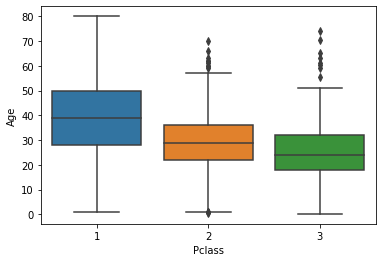

In [19]:
sns.boxplot(x="Pclass",y="Age",data=titanic)
plt.show()

In [20]:
titanic.groupby("Pclass").median()["Age"]

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [21]:
pclass1age=titanic.groupby("Pclass").median()["Age"][1]
pclass2age=titanic.groupby("Pclass").median()["Age"][2]
pclass3age=titanic.groupby("Pclass").median()["Age"][3]

In [22]:
titanic.loc[titanic["Pclass"]==1,"Age"]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
27     19.0
30     40.0
31      NaN
34     28.0
35     42.0
52     49.0
54     65.0
55      NaN
61     38.0
62     45.0
64      NaN
83     28.0
88     23.0
92     46.0
96     71.0
97     23.0
102    21.0
110    47.0
118    24.0
124    54.0
136    19.0
137    37.0
139    24.0
151    22.0
155    51.0
       ... 
308    55.0
314    55.0
316    57.0
323    33.0
324    39.0
327    46.0
331    39.0
335    30.0
343    58.0
350    45.0
355    50.0
356    59.0
364    25.0
368    45.0
371    31.0
372    49.0
374    54.0
375    45.0
378    55.0
390    23.0
391    51.0
395    18.0
397    48.0
400    30.0
402    22.0
403    17.0
404    43.0
407    50.0
411    37.0
414    39.0
Name: Age, Length: 323, dtype: float64

In [23]:
# Clean Age Pclass wise
titanic.loc[titanic["Pclass"]==1,"Age"]=titanic.loc[titanic["Pclass"]==1,"Age"].fillna(pclass1age)

titanic.loc[titanic["Pclass"]==2,"Age"]=titanic.loc[titanic["Pclass"]==2,"Age"].fillna(pclass2age)

titanic.loc[titanic["Pclass"]==3,"Age"]=titanic.loc[titanic["Pclass"]==3,"Age"].fillna(pclass3age)

titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


In [25]:
 titanic.Embarked

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
388    Q
389    S
390    S
391    S
392    S
393    S
394    S
395    S
396    Q
397    C
398    S
399    Q
400    S
401    S
402    C
403    S
404    C
405    C
406    S
407    C
408    Q
409    S
410    Q
411    Q
412    S
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 1309, dtype: object

In [26]:
emb=pd.get_dummies(titanic.Embarked,drop_first=True)
emb.tail(3)

,Q,S
415,0,1
416,0,1
417,0,0


In [27]:
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,NaN,C


In [28]:
sex=pd.get_dummies(titanic.Sex,drop_first=True)
sex.tail(3)

,male
415,1
416,1
417,1


In [29]:
titanic=pd.concat([titanic,emb,sex],axis=1)
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,male
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S,0,1,1
417,1309,NaN,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,NaN,C,0,0,1


In [30]:
titanic=titanic.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked","Cabin"],axis=1)
titanic.tail(3)

,Survived,Age,SibSp,Parch,Fare,Q,S,male
415,NaN,38.5,0,0,7.2500,0,1,1
416,NaN,24.0,0,0,8.0500,0,1,1
417,NaN,24.0,1,1,22.3583,0,0,1


In [31]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male
0,0.0,22.0,1,0,7.2500,0,1,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,1,0
3,1.0,35.0,1,0,53.1000,0,1,0
4,0.0,35.0,0,0,8.0500,0,1,1


In [32]:
titanicTrain=titanic.loc[titanic.Survived.notnull(),]
titanicTrain.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male
0,0.0,22.0,1,0,7.2500,0,1,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,1,0
3,1.0,35.0,1,0,53.1000,0,1,0
4,0.0,35.0,0,0,8.0500,0,1,1


In [33]:
titanicUnknown=titanic.loc[titanic.Survived.isnull(),]
titanicUnknown.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male
0,NaN,34.5,0,0,7.8292,1,0,1
1,NaN,47.0,1,0,7.0000,0,1,0
2,NaN,62.0,0,0,9.6875,1,0,1
3,NaN,27.0,0,0,8.6625,0,1,1
4,NaN,22.0,1,1,12.2875,0,1,0


In [34]:
X=titanicTrain.drop(["Survived"],axis=1)
X.head()

,Age,SibSp,Parch,Fare,Q,S,male
0,22.0,1,0,7.2500,0,1,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,1,0
3,35.0,1,0,53.1000,0,1,0
4,35.0,0,0,8.0500,0,1,1


In [35]:
y=titanicTrain.Survived
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [36]:
y.shape

(891,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [39]:
X_train.head()

,Age,SibSp,Parch,Fare,Q,S,male
669,39.0,1,0,52.0000,0,1,0
141,22.0,0,0,7.7500,0,1,0
280,65.0,0,0,7.7500,1,0,1
599,49.0,1,0,56.9292,0,0,1
852,9.0,1,1,15.2458,0,0,0


In [40]:
titanicUnknown.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male
0,NaN,34.5,0,0,7.8292,1,0,1
1,NaN,47.0,1,0,7.0000,0,1,0
2,NaN,62.0,0,0,9.6875,1,0,1
3,NaN,27.0,0,0,8.6625,0,1,1
4,NaN,22.0,1,1,12.2875,0,1,0


In [41]:
titanicUnknown=titanicUnknown.drop("Survived",axis=1)

In [42]:
titanicUnknown.head()

,Age,SibSp,Parch,Fare,Q,S,male
0,34.5,0,0,7.8292,1,0,1
1,47.0,1,0,7.0000,0,1,0
2,62.0,0,0,9.6875,1,0,1
3,27.0,0,0,8.6625,0,1,1
4,22.0,1,1,12.2875,0,1,0


In [43]:
from sklearn.datasets import load_boston

In [44]:
boston = load_boston()

In [45]:
pd.DataFrame(data=boston.data,columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


# Classification

In [46]:
X_train.head()

,Age,SibSp,Parch,Fare,Q,S,male
669,39.0,1,0,52.0000,0,1,0
141,22.0,0,0,7.7500,0,1,0
280,65.0,0,0,7.7500,1,0,1
599,49.0,1,0,56.9292,0,0,1
852,9.0,1,1,15.2458,0,0,0


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
TitanicKN=KNeighborsClassifier(n_neighbors=1)

In [49]:
TitanicKN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [50]:
TitanicKN.score(X_test,y_test)

0.7350746268656716

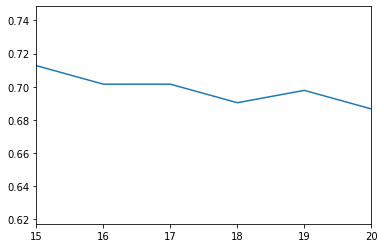

In [51]:
#Loop to find all the values

KNscores=[]
for i in np.arange(1,100):
    TitanicKN=KNeighborsClassifier(n_neighbors=i)
    TitanicKN.fit(X_train,y_train)
    KNscores.append(TitanicKN.score(X_test,y_test))
#print(KNscores)
sns.lineplot(np.arange(1,100),KNscores)
plt.xlim([15,20])
plt.show()

In [52]:
TitanicKN=KNeighborsClassifier(n_neighbors=15)
TitanicKN.fit(X_train,y_train)
TitanicKN.score(X_test,y_test)

0.7126865671641791

In [53]:
output=TitanicKN.predict(titanicUnknown)
output

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [54]:
outputdf=pd.DataFrame({"PassengerID":df2.PassengerId,"Survived":output})
outputdf.head()

,PassengerID,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [55]:
#Saving to CSV
outputdf.to_csv("bhaTitanicKN.csv",index=False,header=True)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel=LogisticRegression()

In [58]:
logmodel.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
logmodel.score(X_test,y_test)

0.7873134328358209

In [60]:
output=logmodel.predict(titanicUnknown)
outputdf=pd.DataFrame({"PassengerID":df2.PassengerId,"Survived":output})
outputdf.to_csv("bhaTitanicLog.csv",index=False,header=True)

In [61]:
#svm
from sklearn.svm import SVC
TitanicSVC=SVC()
TitanicSVC.fit(X_train,y_train)
TitanicSVC.score(X_test,y_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6977611940298507

In [62]:
from sklearn.naive_bayes import GaussianNB
TitanicGNB=GaussianNB()
TitanicGNB.fit(X_train,y_train)
TitanicGNB.score(X_test,y_test)

0.7873134328358209

In [63]:
y_predicted=TitanicGNB.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.7873134328358209

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[138,  30],
       [ 27,  73]], dtype=int64)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
TitanicDT=DecisionTreeClassifier(max_depth=2)

In [68]:
TitanicDT.fit(X_train,y_train)
TitanicDT.score(X_test,y_test)

0.7761194029850746

[Text(167.4, 181.2, 'X[6] <= 0.5\nentropy = 0.475\nsamples = 623\nvalue = [381, 242]'),
 Text(83.7, 108.72, 'X[3] <= 48.2\nentropy = 0.366\nsamples = 216\nvalue = [52, 164]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.438\nsamples = 151\nvalue = [49, 102]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.088\nsamples = 65\nvalue = [3, 62]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 26.269\nentropy = 0.31\nsamples = 407\nvalue = [329, 78]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.214\nsamples = 295\nvalue = [259, 36]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.469\nsamples = 112\nvalue = [70, 42]')]

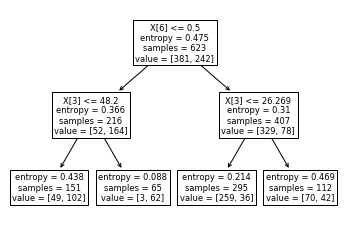

In [69]:
from sklearn.tree import plot_tree
plot_tree(TitanicDT)

In [70]:
X.shape[1]

7

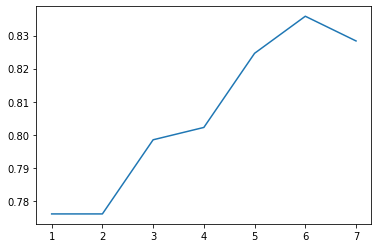

In [71]:
DTscores=[]
for i in np.arange(1,X.shape[1]+1):
    TitanicDT=DecisionTreeClassifier(max_depth=i)
    TitanicDT.fit(X_train,y_train)
    DTscores.append(TitanicDT.score(X_test,y_test))

sns.lineplot(np.arange(1,X.shape[1]+1),DTscores)
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
TitanicRF=RandomForestClassifier(max_depth=5,n_estimators=100)

In [74]:
TitanicRF.fit(X_train,y_train)
TitanicRF.score(X_test,y_test)

0.8022388059701493

In [75]:
output=TitanicRF.predict(titanicUnknown)


In [76]:
type(output)

numpy.ndarray

In [77]:
output=output.astype("int")

In [78]:
outputdf=pd.DataFrame({"PassengerID":df2.PassengerId,"Survived":output})
outputdf.to_csv("bhaTitanicRandomForest.csv",index=False,header=True)

In [79]:
np.zeros((len(np.arange(1,X.shape[1]+1)),len(np.arange(10,500,50))))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

x=np.arange(1,X.shape[1]+1)
yn=np.arange(1,100)
scores=np.zeros((len(x),len(yn)+1))
for i in x:
    for j in yn:
        TitanicRF=RandomForestClassifier(max_depth=i,n_estimators=j)
        TitanicRF.fit(X_train,y_train)
        TitanicRF.score(X_test,y_test)
        print("\n\nMaxDepth:",i,"\nNEstimator: ",j,"\n")
        print(TitanicRF.score(X_test,y_test))
        scores[i,j]=TitanicRF.score(X_test,y_test)

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
TitanicRF=RandomForestClassifier(max_depth=6,n_estimators=63)

In [95]:
CVScore=cross_val_score(TitanicRF,X,y,cv=10)
CVScore

array([0.8       , 0.82222222, 0.7752809 , 0.87640449, 0.85393258,
       0.80898876, 0.78651685, 0.75280899, 0.84269663, 0.82954545])

In [96]:
CVScore.mean()

0.8148396890250822

In [97]:
param_grid={"max_depth":np.arange(1,X.shape[1]+1),
            "n_estimators":[100,250,500,750,1000]}
param_grid

{'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
 'n_estimators': [100, 250, 500, 750, 1000]}

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
TitanicRF=RandomForestClassifier()

In [100]:
grid=GridSearchCV(TitanicRF,param_grid=param_grid,cv=10,scoring="accuracy")

In [101]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [102]:
grid.best_params_

{'max_depth': 7, 'n_estimators': 500}

In [103]:
grid.best_score_

0.8204264870931538

In [104]:
model=grid.best_estimator_

In [105]:
model.predict(titanicUnknown)

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [106]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX=pd.DataFrame(data=boston.data,columns=boston.feature_names)
dfX.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [107]:
dfy=boston.target
dfy[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [108]:
dfX["Target"]=boston.target

In [109]:
dfX.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


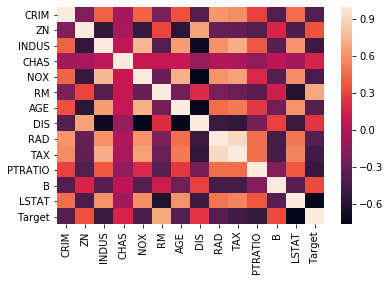

In [110]:
sns.heatmap(dfX.corr())

# Neural Networks

In [112]:
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier

In [114]:
clf= MLPClassifier(hidden_layer_sizes=(15,7,7))


In [115]:
clf.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 7, 7), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [116]:
clf.score(X_test,y_test)

0.7276119402985075

In [119]:
from xgboost import XGBClassifier


In [120]:
xgclf=XGBClassifier()
xgclf.fit(X_train,y_train)
xgclf.score(X_test,y_test)

0.8283582089552238

# Time Series